<a href="https://colab.research.google.com/github/rishavkumar33/lung_cancer_detection/blob/main/lung_cancer__detect_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/lung/Data'
#path_No = '/content/drive/MyDrive/archive/no/*'
#path_Yes = '/content/drive/MyDrive/archive/yes/*'

In [ ]:
import numpy as np
import pandas as pd
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['adenocarcinoma','large_cell_carcinoma','normal','squamous_cell_carcinoma']
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/lung/Data/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/lung/Data/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

KeyboardInterrupt: 

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)  #train test split.

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model_save_path = '/content/drive/MyDrive/model/lung_cancer_model1.h5'
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
#we use categorical cross_entropy.


In [ ]:
history = model.fit(X_train,y_train,epochs=1,validation_split=0.1)

In [ ]:
model.save(model_save_path)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

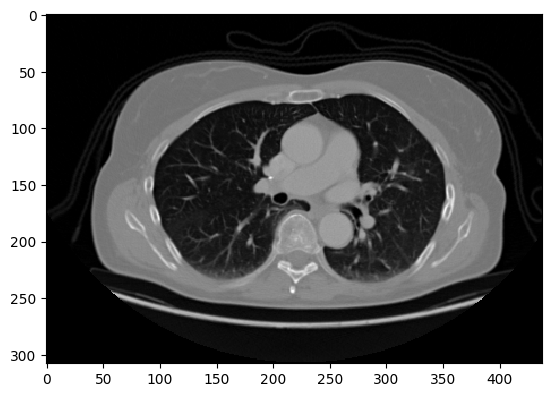

1/1 [==============================] - 0s 474ms/step
Predicted cancer type is large_cell_carcinoma


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

#  pre-trained model loading
model = load_model('/content/drive/MyDrive/model/lung_cancer_model.h5')
img = cv2.imread('/content/drive/MyDrive/lung/Data/Testing/large_cell_carcinoma/000110.png')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape
img_array = img_array.reshape(1,150,150,3)
img_array.shape
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/lung/Data/Testing/large_cell_carcinoma/000110.png')
plt.imshow(img,interpolation='nearest')
plt.show()
a=model.predict(img_array)
indices = a.argmax()
indices

if indices == 0:
    print("Predicted cancer type is adenocarcinoma")
elif indices == 1:
    print("Predicted cancer type is large_cell_carcinoma")
elif indices == 2:
    print("Predicted cancer type is no cancer")
elif indices == 3:
    print("Predicted cancer type is squamous_cell_carcinoma")
else:
    print("Unknown cancer type")